<a href="https://colab.research.google.com/github/lobnaabdelhamed97/MURA-/blob/master/Copy_of_patternfinalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MURA classification***

# Download and understand dataset

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"lobnaabdelhamed","key":"1c9bcaa0517f9be89a195f8ad7139a97"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


-rw-r--r-- 1 root root 71 Jan 21 19:19 kaggle.json


In [0]:

!kaggle datasets download -d cjinny/mura-v11

mura-v11.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzipping data 

In [0]:
from zipfile import ZipFile 
file_name = "mura-v11.zip" 
with ZipFile(file_name,'r') as zip: 
  zip.extractall() 
  print('Done')

Done


# Read csv files

In [0]:
import pandas as pd
columns = ['data','label']    
trainLabelDF = pd.read_csv('/content/MURA-v1.1/train_labeled_studies.csv',names=columns,encoding='latin1') 
testLabelDF = pd.read_csv('/content/MURA-v1.1/valid_labeled_studies.csv',names=columns,encoding='latin1') 
print("original data format")
trainLabelDF.head()

original data format


,data,label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [0]:
G_test = testLabelDF[["label"]]

In [0]:
print("training colums:")
for column in trainLabelDF:
  print(column)
print("\ntesting colums:")
for column in testLabelDF:
  print(column)

training colums:
data
label

testing colums:
data
label


In [0]:
# new data frame with split value columns 
new = trainLabelDF["data"].str.split("/", n = 5, expand = True)  
# making separate last name column from new data frame 
trainLabelDF["Bone"]= new[2]
trainLabelDF["Patient"]= new[3]
trainLabelDF["Study"]  = new[4]
# Dropping old Name columns 
trainLabelDF.drop(columns =["data"], inplace = True) 
# df display 
trainLabelDF 

,label,Bone,Patient,Study
0,1,XR_SHOULDER,patient00001,study1_positive
1,1,XR_SHOULDER,patient00002,study1_positive
2,1,XR_SHOULDER,patient00003,study1_positive
3,1,XR_SHOULDER,patient00004,study1_positive
4,1,XR_SHOULDER,patient00005,study1_positive
...,...,...,...,...
13452,0,XR_HAND,patient11180,study1_negative
13453,0,XR_HAND,patient11181,study1_negative
13454,0,XR_HAND,patient11182,study1_negative
13455,0,XR_HAND,patient11183,study1_negative


In [0]:
# new data frame with split value columns 
new = testLabelDF["data"].str.split("/", n = 5, expand = True)  
# making separate last name column from new data frame 
testLabelDF["Bone"]= new[2]
testLabelDF["Patient"]= new[3]
testLabelDF["Study"]  = new[4] 
# Dropping old Name columns 
testLabelDF.drop(columns =["data"], inplace = True) 
# df display 
testLabelDF 

,label,Bone,Patient,Study
0,1,XR_WRIST,patient11185,study1_positive
1,1,XR_WRIST,patient11186,study1_positive
2,1,XR_WRIST,patient11186,study2_positive
3,1,XR_WRIST,patient11186,study3_positive
4,1,XR_WRIST,patient11187,study1_positive
...,...,...,...,...
1194,0,XR_FINGER,patient11965,study1_negative
1195,0,XR_FINGER,patient11855,study1_negative
1196,0,XR_FINGER,patient11966,study1_negative
1197,0,XR_FINGER,patient11967,study1_negative


In [0]:
P_test = testLabelDF[["Patient"]].values
S_test = testLabelDF[["Study"]].values
B_test = testLabelDF[["Bone"]].values

In [0]:
import numpy as np
frequencyTrain=trainLabelDF["Bone"].value_counts()
frequencyTest=testLabelDF["Bone"].value_counts()
frequencyTrainPositive = trainLabelDF.loc[trainLabelDF['label'] == 1]
frequencyTestPositive = testLabelDF.loc[testLabelDF['label'] == 1]
frequencyTrainNeg = trainLabelDF.loc[trainLabelDF['label'] == 0]
frequencyTestNeg = testLabelDF.loc[testLabelDF['label'] == 0]
frequencyTrainPositive=frequencyTrainPositive["Bone"].value_counts()
frequencyTestPositive=frequencyTestPositive["Bone"].value_counts()
frequencyTrainNeg=frequencyTrainNeg["Bone"].value_counts()
frequencyTestNeg=frequencyTestNeg["Bone"].value_counts()

In [0]:
frequencyTrain = frequencyTrain.to_frame(name=None)
print("frequency of train:")
print(frequencyTrain)
frequencyTest = frequencyTest.to_frame(name=None)
print("frequency of test:")
print(frequencyTest)
frequencyTrainPositive = frequencyTrainPositive.to_frame(name=None)
print("frequency of positive train:")
print(frequencyTrainPositive)
frequencyTestPositive = frequencyTestPositive.to_frame(name=None)
print("frequency of positive test:")
print(frequencyTestPositive)
frequencyTrainNeg = frequencyTrainNeg.to_frame(name=None)
print("frequency of negative train:")
print(frequencyTrainNeg)
frequencyTestNeg = frequencyTestNeg.to_frame(name=None)
print("frequency of negative test:")
print(frequencyTestNeg)


frequency of train:
             Bone
XR_WRIST     3460
XR_SHOULDER  2821
XR_HAND      2018
XR_FINGER    1935
XR_ELBOW     1754
XR_FOREARM    877
XR_HUMERUS    592
frequency of test:
             Bone
XR_WRIST      237
XR_SHOULDER   194
XR_FINGER     175
XR_HAND       167
XR_ELBOW      158
XR_HUMERUS    135
XR_FOREARM    133
frequency of positive train:
             Bone
XR_SHOULDER  1457
XR_WRIST     1326
XR_ELBOW      660
XR_FINGER     655
XR_HAND       521
XR_FOREARM    287
XR_HUMERUS    271
frequency of positive test:
             Bone
XR_WRIST       97
XR_SHOULDER    95
XR_FINGER      83
XR_HUMERUS     67
XR_HAND        66
XR_ELBOW       66
XR_FOREARM     64
frequency of negative train:
             Bone
XR_WRIST     2134
XR_HAND      1497
XR_SHOULDER  1364
XR_FINGER    1280
XR_ELBOW     1094
XR_FOREARM    590
XR_HUMERUS    321
frequency of negative test:
             Bone
XR_WRIST      140
XR_HAND       101
XR_SHOULDER    99
XR_FINGER      92
XR_ELBOW       92
XR_FOREARM     69
X

training data freq


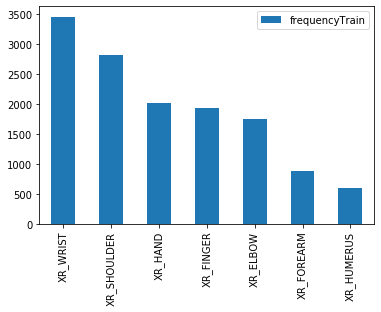

testing data freq


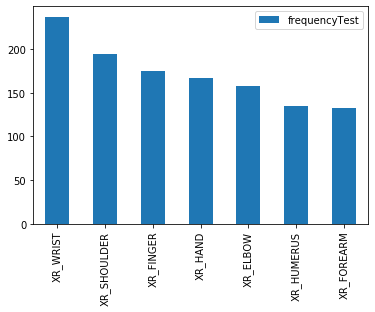

In [0]:
import matplotlib.pyplot as plt
print("training data freq")
frequencyTrain.plot(kind='bar',y='Bone',label='frequencyTrain')
plt.show()
print("testing data freq")
frequencyTest.plot(kind='bar',y='Bone',label='frequencyTest')
plt.show()


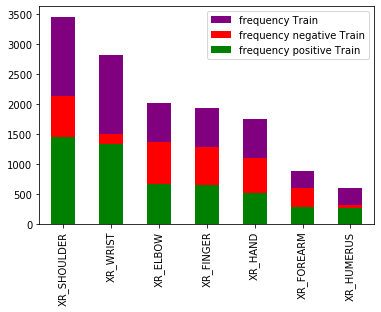

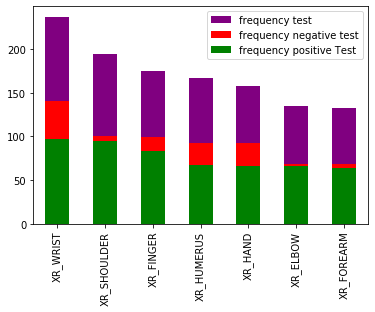

In [0]:
ax = plt.gca()
frequencyTrain.plot(kind='bar',y='Bone', color='purple' ,ax=ax,label='frequency Train')
frequencyTrainNeg.plot(kind='bar',y='Bone', color='red', ax=ax,label='frequency negative Train')
frequencyTrainPositive.plot(kind='bar',y='Bone', color='green', ax=ax,label='frequency positive Train')
plt.show()
ax = plt.gca()
frequencyTest.plot(kind='bar',y='Bone', color='purple', ax=ax,label='frequency test')
frequencyTestNeg.plot(kind='bar',y='Bone', color='red', ax=ax,label='frequency negative test')
frequencyTestPositive.plot(kind='bar',y='Bone', color='green', ax=ax,label='frequency positive Test')
plt.show()

In [0]:
import pandas as pd 
from matplotlib import pyplot as plt
column= ['path']    

trainPathDF = pd.read_csv('/content/MURA-v1.1/train_image_paths.csv',names=column,encoding='latin1') 
testPathDF = pd.read_csv('/content/MURA-v1.1/valid_image_paths.csv',names=column,encoding='latin1') 

print(trainPathDF)

                                                    path
0      MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1      MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2      MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3      MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4      MURA-v1.1/train/XR_SHOULDER/patient00002/study...
...                                                  ...
36803  MURA-v1.1/train/XR_HAND/patient11183/study1_ne...
36804  MURA-v1.1/train/XR_HAND/patient11183/study1_ne...
36805  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...
36806  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...
36807  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...

[36808 rows x 1 columns]


In [0]:
print(testPathDF)

                                                   path
0     MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1     MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2     MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3     MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4     MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...
...                                                 ...
3192  MURA-v1.1/valid/XR_FINGER/patient11967/study1_...
3193  MURA-v1.1/valid/XR_FINGER/patient11967/study1_...
3194  MURA-v1.1/valid/XR_FINGER/patient11738/study1_...
3195  MURA-v1.1/valid/XR_FINGER/patient11738/study1_...
3196  MURA-v1.1/valid/XR_FINGER/patient11738/study1_...

[3197 rows x 1 columns]


In [0]:
print("training colums:")
for column in trainPathDF:
  print(column)
print("\ntesting colums:")
for column in testPathDF:
  print(column)

training colums:
path

testing colums:
path


In [0]:
# new data frame with split value columns 
new = trainPathDF['path'].str.split("/", n = 5, expand = True)  
# making separate last name column from new data frame 
trainPathDF["Label"]= new[4]
trainPathDF["Patient"]= new[3]
trainPathDF["Bone"]= new[2]
# df display 
trainPathDF 

,path,Label,Patient,Bone
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,study1_positive,patient00001,XR_SHOULDER
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,study1_positive,patient00001,XR_SHOULDER
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,study1_positive,patient00001,XR_SHOULDER
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,study1_positive,patient00002,XR_SHOULDER
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,study1_positive,patient00002,XR_SHOULDER
...,...,...,...,...
36803,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...,study1_negative,patient11183,XR_HAND
36804,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...,study1_negative,patient11183,XR_HAND
36805,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...,study1_negative,patient11184,XR_HAND
36806,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...,study1_negative,patient11184,XR_HAND


In [0]:
# new data frame with split value columns 
new = testPathDF["path"].str.split("/", n = 6, expand = True)  
# making separate last name column from new data frame 
testPathDF["Label"]= new[4]
testPathDF["Bone"]= new[2]
testPathDF["Patient"]= new[3]
# df display 
testPathDF

,path,Label,Bone,Patient
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,study1_positive,XR_WRIST,patient11185
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,study1_positive,XR_WRIST,patient11185
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,study1_positive,XR_WRIST,patient11185
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,study1_positive,XR_WRIST,patient11185
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,study1_positive,XR_WRIST,patient11186
...,...,...,...,...
3192,MURA-v1.1/valid/XR_FINGER/patient11967/study1_...,study1_negative,XR_FINGER,patient11967
3193,MURA-v1.1/valid/XR_FINGER/patient11967/study1_...,study1_negative,XR_FINGER,patient11967
3194,MURA-v1.1/valid/XR_FINGER/patient11738/study1_...,study1_negative,XR_FINGER,patient11738
3195,MURA-v1.1/valid/XR_FINGER/patient11738/study1_...,study1_negative,XR_FINGER,patient11738


In [0]:
P_testImage = testPathDF[["Patient"]].values
S_testImage = testPathDF[["Label"]].values
B_testImage = testPathDF[["Bone"]].values


In [0]:
temp = trainPathDF[["Label"]].values
temp=np.unique(temp)
tempLabel = {
		temp[0]: 0,
		temp[1] : 1,
		temp[2]: 0,
		temp[3] : 1,
		temp[4]: 0,
		temp[5] : 1,
		temp[6]: 0,
		temp[7] : 1,
	}
trainPathDF = trainPathDF.replace({"Label":tempLabel})
testPathDF = testPathDF.replace({"Label":tempLabel})


In [0]:
temp = trainPathDF[["Bone"]].values
temp=np.unique(temp)
tempLabel = {
		temp[0]: 0,
		temp[1] : 1,
    temp[2]: 2,
		temp[3] : 3,
    temp[4]: 4,
		temp[5] : 5,
    temp[6]: 6,
		
	}

trainPathDF['BoneLabel']=trainPathDF['Bone']
trainPathDF=trainPathDF.replace({"BoneLabel":tempLabel})

In [0]:
boneList = temp

In [0]:
print(trainPathDF)  


                                                    path  ...  BoneLabel
0      MURA-v1.1/train/XR_SHOULDER/patient00001/study...  ...          5
1      MURA-v1.1/train/XR_SHOULDER/patient00001/study...  ...          5
2      MURA-v1.1/train/XR_SHOULDER/patient00001/study...  ...          5
3      MURA-v1.1/train/XR_SHOULDER/patient00002/study...  ...          5
4      MURA-v1.1/train/XR_SHOULDER/patient00002/study...  ...          5
...                                                  ...  ...        ...
36803  MURA-v1.1/train/XR_HAND/patient11183/study1_ne...  ...          3
36804  MURA-v1.1/train/XR_HAND/patient11183/study1_ne...  ...          3
36805  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...  ...          3
36806  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...  ...          3
36807  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...  ...          3

[36808 rows x 5 columns]


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import PIL
train = list()
trainDirList = trainPathDF['path']
for i in range(len(trainDirList)):
  temp = str(trainDirList[i])
  image = cv2.imread(temp)
  imageFromArray = PIL.Image.fromarray(image,"RGB")
  img = imageFromArray.resize((224,224))
  train.append(np.array(img))

print(np.shape(train))

(36808, 224, 224, 3)


In [0]:
test = list()
testDirList = testPathDF['path']
for i in range(len(testDirList)):
  temp = str(testDirList[i])
  image = cv2.imread(temp)
  imageFromArray = PIL.Image.fromarray(image,"RGB")
  img = imageFromArray.resize((224,224))
  test.append(np.array(img))

print(np.shape(test))
X_test = np.array(test)

(3197, 224, 224, 3)


In [0]:
y_test = testPathDF['Label'].values

In [0]:
Cells=np.array(train)
labels=np.array(trainPathDF[["Label"]].values)
bonelabels=np.array(trainPathDF[["BoneLabel"]].values)

In [0]:
#from sklearn.utils import shuffle
#Cells, labels = shuffle(Cells,labels, random_state=0)

In [0]:
from sklearn.utils import shuffle
temp=0
idx = list(range(36808))
bones=list(range(7))
while (temp == 0):
  np.random.shuffle(idx)
  Cells = Cells[idx]
  labels = labels[idx]
  bonelabels=bonelabels[idx]
  (X_train,X_valid)=Cells[(int)(0.1*len(labels)):],Cells[:(int)(0.1*len(labels))]
  #X_train = X_train.astype('float64')/255 
  #X_valid = X_valid.astype('float64')/255
  (y_train,y_valid)=labels[(int)(0.1*len(labels)):],labels[:(int)(0.1*len(labels))]
  (bone_train,bone_valid)=bonelabels[(int)(0.1*len(bonelabels)):],bonelabels[:(int)(0.1*len(bonelabels))]
 
  temp = 1
       
  if(all(elem in bone_train for elem in bones) and all(elem in bone_valid for elem in bones)):
    temp=1
  else:
    temp=0

In [0]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [0]:
import keras
from keras.models import Model
from keras.layers import  Input
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout # new!
from keras.layers.normalization import BatchNormalization # new!
from keras import regularizers # new! 
from keras.optimizers import SGD
from keras.layers import Flatten, Conv2D, MaxPooling2D # new!
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

In [0]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
y_valid = keras.utils.to_categorical(y_valid, 2)


In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from keras.layers import  Input
from keras.layers import  GlobalAveragePooling2D
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#copy of single pre-trained mobilenet model with weights that were saved from being trained on imagenet images
mobile2=keras.applications.mobilenet.MobileNet()


In [0]:
mobile2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
x=mobile2.output

predictions=Dense(2,activation='sigmoid')(x)

model2=Model(inputs=mobile2.input,outputs=predictions)



In [0]:
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:

for layer in model2.layers:

  layer.trainable=True


In [0]:
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:
import tensorflow as tf
model2.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
#model.fit_generator(X_train,y_train,epochs=30,verbose=1,validation_data=(X_valid, y_valid))
hist = model2.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Train on 33128 samples, validate on 3680 samples
Epoch 1/20
33128/33128 [==============================] - 187s 6ms/step - loss: 0.6657 - acc: 0.7364 - val_loss: 0.6510 - val_acc: 0.7473
Epoch 2/20
33128/33128 [==============================] - 178s 5ms/step - loss: 0.6336 - acc: 0.7669 - val_loss: 0.6201 - val_acc: 0.7764
Epoch 3/20
33128/33128 [==============================] - 177s 5ms/step - loss: 0.6111 - acc: 0.7681 - val_loss: 0.6140 - val_acc: 0.7462
Epoch 4/20
33128/33128 [==============================] - 177s 5ms/step - loss: 0.5856 - acc: 0.7892 - val_loss: 0.5918 - val_acc: 0.7508
Epoch 5/20
33128/33128 [==============================] - 176s 5ms/step - loss: 0.5681 - acc: 0.7911 - val_loss: 0.5696 - val_acc: 0.7755
Epoch 6/20
33128/33128 [==============================] - 176s 5ms/step - loss: 0.5468 - acc: 0.8013 - val_loss: 0.5526 - val_acc: 0.7848
Epoch 7/20
33128/33128 [==============================] - 176s 5ms/step - loss: 0.5238 - acc: 0.8129 - val_loss: 0.5413 - v

In [0]:
(loss, accuracy) = model2.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("loss")
print(loss)
print("accuracy")
print(accuracy)

3197/3197 [==============================] - 5s 1ms/step
loss
0.5212937284157282
accuracy
0.7882389724907146


In [0]:
predictionList = model2.predict(X_test)


In [0]:
studyResult = list()
temp0 = 0 
temp1 = 0
j = 0 
for i in range(len(testLabelDF)):
    while P_test[i] == P_testImage[j] and S_test[i] == S_testImage[j] and j < 3196:
      temp0 = temp0 + predictionList[j,0]
      temp1 = temp1 + predictionList[j,1]
      j = j+1
    if temp0 > temp1:
      studyResult.append(0)
    else:
      studyResult.append(1)
    temp0 = 0 
    temp1 = 0


In [0]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
print("overall")
print("accuracy")
print(accuracy_score(G_test, studyResult))
print("kappa")
print(cohen_kappa_score(G_test, studyResult, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
import pandas as pd 
df = pd.DataFrame(B_test, columns = ['Bone']) 
df["studyResult"] = studyResult
df["G_test"] = G_test

elbow = df.loc[df['Bone'] == 'XR_ELBOW'][['studyResult']]
elbowG = df.loc[df['Bone'] == 'XR_ELBOW'][['G_test']]
print("elbow")
print("accuracy")
print(accuracy_score(elbowG.values, elbow.values))
print("kappa")
print(cohen_kappa_score(elbowG.values, elbow.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
finger = df.loc[df['Bone'] == 'XR_FINGER'][['studyResult']]
fingerG =  df.loc[df['Bone'] == 'XR_FINGER'][['G_test']]
print("finger")
print("accuracy")
print(accuracy_score(fingerG.values, finger.values))
print("kappa")
print(cohen_kappa_score(fingerG.values, finger.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
forearm = df.loc[df['Bone'] == 'XR_FOREARM'][['studyResult']]
forearmG = df.loc[df['Bone'] == 'XR_FOREARM'][['G_test']]
print("forearm")
print("accuracy")
print(accuracy_score(forearmG.values, forearm.values))
print("kappa")
print(cohen_kappa_score(forearmG.values, forearm.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
hand = df.loc[df['Bone'] == 'XR_HAND'][['studyResult']]
handG = df.loc[df['Bone'] == 'XR_HAND'][['G_test']]
print("hand")
print("accuracy")
print(accuracy_score(handG.values, hand.values))
print("kappa")
print(cohen_kappa_score(handG.values, hand.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
humerus = df.loc[df['Bone'] == 'XR_HUMERUS'][['studyResult']]
humerusG = df.loc[df['Bone'] == 'XR_HUMERUS'][['G_test']]
print("humerus")
print("accuracy")
print(accuracy_score(humerusG.values, humerus.values))
print("kappa")
print(cohen_kappa_score(humerusG.values, humerus.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
shoulder = df.loc[df['Bone'] == 'XR_SHOULDER'][['studyResult']]
shoulderG = df.loc[df['Bone'] == 'XR_SHOULDER'][['G_test']]
print("shoulder")
print("accuracy")
print(accuracy_score(shoulderG.values, shoulder.values))
print("kappa")
print(cohen_kappa_score(shoulderG.values, shoulder.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
wrist = df.loc[df['Bone'] == 'XR_SHOULDER'][['studyResult']]
wristG = df.loc[df['Bone'] == 'XR_SHOULDER'][['G_test']]
print("wrist")
print("accuracy")
print(accuracy_score(wristG.values, wrist.values))
print("kappa")
print(cohen_kappa_score(wristG.values, wrist.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")

overall
accuracy
0.8115095913261051
kappa
0.6175546554133206
----------------------------------------------------------------------------------------------------------------------------------------
elbow
accuracy
0.8481012658227848
kappa
0.6877470355731226
----------------------------------------------------------------------------------------------------------------------------------------
finger
accuracy
0.8171428571428572
kappa
0.6324494618009977
----------------------------------------------------------------------------------------------------------------------------------------
forearm
accuracy
0.8345864661654135
kappa
0.666438668490652
----------------------------------------------------------------------------------------------------------------------------------------
hand
accuracy
0.7544910179640718
kappa
0.46243228389730706
----------------------------------------------------------------------------------------------------------------------------------------
humerus
accuracy

In [0]:

mobile=keras.applications.mobilenet.MobileNet(include_top=False,input_shape=(224,224,3))


In [0]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
x=mobile.output
x = GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
predictions=Dense(2,activation='sigmoid')(x)

model=Model(inputs=mobile.input,outputs=predictions)



In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:

for layer in model.layers:

  layer.trainable=True


In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:
import tensorflow as tf
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Train on 33128 samples, validate on 3680 samples
Epoch 1/20
33128/33128 [==============================] - 181s 5ms/step - loss: 0.4985 - acc: 0.7687 - val_loss: 0.4754 - val_acc: 0.7946
Epoch 2/20
33128/33128 [==============================] - 173s 5ms/step - loss: 0.3991 - acc: 0.8246 - val_loss: 0.4769 - val_acc: 0.7837
Epoch 3/20
33128/33128 [==============================] - 173s 5ms/step - loss: 0.3188 - acc: 0.8641 - val_loss: 0.6032 - val_acc: 0.7793
Epoch 4/20
33128/33128 [==============================] - 173s 5ms/step - loss: 0.2330 - acc: 0.9032 - val_loss: 0.5901 - val_acc: 0.7951
Epoch 5/20
33128/33128 [==============================] - 173s 5ms/step - loss: 0.1555 - acc: 0.9376 - val_loss: 0.7926 - val_acc: 0.7785
Epoch 6/20
33128/33128 [==============================] - 172s 5ms/step - loss: 0.1129 - acc: 0.9558 - val_loss: 0.6714 - val_acc: 0.7851
Epoch 7/20
33128/33128 [==============================] - 172s 5ms/step - loss: 0.0859 - acc: 0.9679 - val_loss: 0.7456 - v

In [0]:
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("loss")
print(loss)
print("accuracy")
print(accuracy)

3197/3197 [==============================] - 4s 1ms/step
loss
1.0677852333199487
accuracy
0.7873005927690387


In [0]:
predictionList = model.predict(X_test)


In [0]:
studyResult = list()
temp0 = 0 
temp1 = 0
j = 0 
for i in range(len(testLabelDF)):
    while P_test[i] == P_testImage[j] and S_test[i] == S_testImage[j] and j < 3196:
      temp0 = temp0 + predictionList[j,0]
      temp1 = temp1 + predictionList[j,1]
      j = j+1
    if temp0 > temp1:
      studyResult.append(0)
    else:
      studyResult.append(1)
    temp0 = 0 
    temp1 = 0


In [0]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
print("overall")
print("accuracy")
print(accuracy_score(G_test, studyResult))
print("kappa")
print(cohen_kappa_score(G_test, studyResult, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
import pandas as pd 
df = pd.DataFrame(B_test, columns = ['Bone']) 
df["studyResult"] = studyResult
df["G_test"] = G_test

elbow = df.loc[df['Bone'] == 'XR_ELBOW'][['studyResult']]
elbowG = df.loc[df['Bone'] == 'XR_ELBOW'][['G_test']]
print("elbow")
print("accuracy")
print(accuracy_score(elbowG.values, elbow.values))
print("kappa")
print(cohen_kappa_score(elbowG.values, elbow.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
finger = df.loc[df['Bone'] == 'XR_FINGER'][['studyResult']]
fingerG =  df.loc[df['Bone'] == 'XR_FINGER'][['G_test']]
print("finger")
print("accuracy")
print(accuracy_score(fingerG.values, finger.values))
print("kappa")
print(cohen_kappa_score(fingerG.values, finger.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
forearm = df.loc[df['Bone'] == 'XR_FOREARM'][['studyResult']]
forearmG = df.loc[df['Bone'] == 'XR_FOREARM'][['G_test']]
print("forearm")
print("accuracy")
print(accuracy_score(forearmG.values, forearm.values))
print("kappa")
print(cohen_kappa_score(forearmG.values, forearm.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
hand = df.loc[df['Bone'] == 'XR_HAND'][['studyResult']]
handG = df.loc[df['Bone'] == 'XR_HAND'][['G_test']]
print("hand")
print("accuracy")
print(accuracy_score(handG.values, hand.values))
print("kappa")
print(cohen_kappa_score(handG.values, hand.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
humerus = df.loc[df['Bone'] == 'XR_HUMERUS'][['studyResult']]
humerusG = df.loc[df['Bone'] == 'XR_HUMERUS'][['G_test']]
print("humerus")
print("accuracy")
print(accuracy_score(humerusG.values, humerus.values))
print("kappa")
print(cohen_kappa_score(humerusG.values, humerus.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
shoulder = df.loc[df['Bone'] == 'XR_SHOULDER'][['studyResult']]
shoulderG = df.loc[df['Bone'] == 'XR_SHOULDER'][['G_test']]
print("shoulder")
print("accuracy")
print(accuracy_score(shoulderG.values, shoulder.values))
print("kappa")
print(cohen_kappa_score(shoulderG.values, shoulder.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
wrist = df.loc[df['Bone'] == 'XR_SHOULDER'][['studyResult']]
wristG = df.loc[df['Bone'] == 'XR_SHOULDER'][['G_test']]
print("wrist")
print("accuracy")
print(accuracy_score(wristG.values, wrist.values))
print("kappa")
print(cohen_kappa_score(wristG.values, wrist.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")

overall
accuracy
0.8273561301084237
kappa
0.6476888331812096
----------------------------------------------------------------------------------------------------------------------------------------
elbow
accuracy
0.879746835443038
kappa
0.7468375780064092
----------------------------------------------------------------------------------------------------------------------------------------
finger
accuracy
0.8057142857142857
kappa
0.6062210456651225
----------------------------------------------------------------------------------------------------------------------------------------
forearm
accuracy
0.8270676691729323
kappa
0.6506794564348521
----------------------------------------------------------------------------------------------------------------------------------------
hand
accuracy
0.7724550898203593
kappa
0.5085192069392812
----------------------------------------------------------------------------------------------------------------------------------------
humerus
accuracy


# VGG 19

In [0]:
net_input = Input(shape=(224,224,3))
vgg19 = keras.applications.vgg19.VGG19(include_top= True, weights='imagenet', input_tensor=net_input)
vgg19.summary()


574717952/574710816 [==============================] - 15s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [0]:
last_layer = vgg19.get_layer('fc2').output
out = Dense(2, activation='softmax', name='output')(last_layer)
custom_vgg_model1 = Model(net_input, out)
custom_vgg_model1.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
for layer in custom_vgg_model1.layers[:-1]:
      layer.trainable = False 
custom_vgg_model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
custom_vgg_model1.compile(loss='binary_crossentropy',optimizer= 'rmsprop' ,metrics=['accuracy'])

In [0]:
hist = custom_vgg_model1.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1, validation_data=(X_valid, y_valid))


Train on 33128 samples, validate on 3680 samples
Epoch 1/1
33128/33128 [==============================] - 111s 3ms/step - loss: 0.7469 - acc: 0.6984 - val_loss: 1.0412 - val_acc: 0.6554


In [0]:
(loss, accuracy) = custom_vgg_model1.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("loss")
print(loss)
print("accuracy")
print(accuracy)

3197/3197 [==============================] - 13s 4ms/step
loss
1.2031035472803933
accuracy
0.6080700666747094


In [0]:
predictionList = custom_vgg_model1.predict(X_test)

In [0]:
print(np.shape(S_testImage))

(3197, 1)


In [0]:
studyResult = list()
temp0 = 0 
temp1 = 0
j = 0 
for i in range(len(testLabelDF)):
    while P_test[i] == P_testImage[j] and S_test[i] == S_testImage[j] and j < 3196:
      temp0 = temp0 + predictionList[j,0]
      #print("temp0 ",temp0)
      temp1 = temp1 + predictionList[j,1]
      #print("temp1 ",temp1)
      j = j+1
    if temp0 > temp1:
      studyResult.append(0)
    else:
      studyResult.append(1)
    temp0 = 0 
    temp1 = 0




In [0]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
print("overall")
print("accuracy")
print(accuracy_score(G_test, studyResult))
print("kappa")
print(cohen_kappa_score(G_test, studyResult, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
import pandas as pd 
df = pd.DataFrame(B_test, columns = ['Bone']) 
df["studyResult"] = studyResult
df["G_test"] = G_test

elbow = df.loc[df['Bone'] == 'XR_ELBOW'][['studyResult']]
elbowG = df.loc[df['Bone'] == 'XR_ELBOW'][['G_test']]
print("elbow")
print("accuracy")
print(accuracy_score(elbowG.values, elbow.values))
print("kappa")
print(cohen_kappa_score(elbowG.values, elbow.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
finger = df.loc[df['Bone'] == 'XR_FINGER'][['studyResult']]
fingerG =  df.loc[df['Bone'] == 'XR_FINGER'][['G_test']]
print("finger")
print("accuracy")
print(accuracy_score(fingerG.values, finger.values))
print("kappa")
print(cohen_kappa_score(fingerG.values, finger.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
forearm = df.loc[df['Bone'] == 'XR_FOREARM'][['studyResult']]
forearmG = df.loc[df['Bone'] == 'XR_FOREARM'][['G_test']]
print("forearm")
print("accuracy")
print(accuracy_score(forearmG.values, forearm.values))
print("kappa")
print(cohen_kappa_score(forearmG.values, forearm.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
hand = df.loc[df['Bone'] == 'XR_HAND'][['studyResult']]
handG = df.loc[df['Bone'] == 'XR_HAND'][['G_test']]
print("hand")
print("accuracy")
print(accuracy_score(handG.values, hand.values))
print("kappa")
print(cohen_kappa_score(handG.values, hand.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
humerus = df.loc[df['Bone'] == 'XR_HUMERUS'][['studyResult']]
humerusG = df.loc[df['Bone'] == 'XR_HUMERUS'][['G_test']]
print("humerus")
print("accuracy")
print(accuracy_score(humerusG.values, humerus.values))
print("kappa")
print(cohen_kappa_score(humerusG.values, humerus.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
shoulder = df.loc[df['Bone'] == 'XR_SHOULDER'][['studyResult']]
shoulderG = df.loc[df['Bone'] == 'XR_SHOULDER'][['G_test']]
print("shoulder")
print("accuracy")
print(accuracy_score(shoulderG.values, shoulder.values))
print("kappa")
print(cohen_kappa_score(shoulderG.values, shoulder.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
wrist = df.loc[df['Bone'] == 'XR_SHOULDER'][['studyResult']]
wristG = df.loc[df['Bone'] == 'XR_SHOULDER'][['G_test']]
print("wrist")
print("accuracy")
print(accuracy_score(wristG.values, wrist.values))
print("kappa")
print(cohen_kappa_score(wristG.values, wrist.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")

overall
accuracy
0.6146788990825688
kappa
0.15511866268073948
----------------------------------------------------------------------------------------------------------------------------------------
elbow
accuracy
0.6518987341772152
kappa
0.18891170431211501
----------------------------------------------------------------------------------------------------------------------------------------
finger
accuracy
0.6057142857142858
kappa
0.17582417582417587
----------------------------------------------------------------------------------------------------------------------------------------
forearm
accuracy
0.5263157894736842
kappa
0.01620288834096506
----------------------------------------------------------------------------------------------------------------------------------------
hand
accuracy
0.6107784431137725
kappa
0.024445043587669746
----------------------------------------------------------------------------------------------------------------------------------------
humerus
ac

In [0]:
net_input = Input(shape=(224,224,3))
vgg19 = keras.applications.vgg19.VGG19(include_top= True, weights='imagenet', input_tensor=net_input)
vgg19.summary()

NameError: ignored

change number of classes from 1000 to 2

In [0]:
last_layer = vgg19.get_layer('fc2').output
out = Dense(2, activation='softmax', name='output')(last_layer)
custom_vgg_model1 = Model(net_input, out)
custom_vgg_model1.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### freeze layers 

In [0]:
for layer in custom_vgg_model1.layers[:-1]:
      layer.trainable = False 
custom_vgg_model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
hist = custom_vgg_model1.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1, validation_data=(X_valid, y_valid))


Train on 33128 samples, validate on 3680 samples
Epoch 1/1
33128/33128 [==============================] - 111s 3ms/step - loss: 0.7186 - acc: 0.7098 - val_loss: 0.9218 - val_acc: 0.6935


In [0]:
(loss, accuracy) = custom_vgg_model1.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("loss")
print(loss)
print("accuracy")
print(accuracy)

3197/3197 [==============================] - 13s 4ms/step
loss
1.124621918776577
accuracy
0.6330935255387518


In [0]:
predictionList = custom_vgg_model1.predict(X_test)

In [0]:
print(np.shape(S_testImage))

(3197, 1)


In [0]:
studyResult = list()
temp0 = 0 
temp1 = 0
j = 0 
for i in range(len(testLabelDF)):
    while P_test[i] == P_testImage[j] and S_test[i] == S_testImage[j] and j < 3196:
      temp0 = temp0 + predictionList[j,0]
      #print("temp0 ",temp0)
      temp1 = temp1 + predictionList[j,1]
      #print("temp1 ",temp1)
      j = j+1
    if temp0 > temp1:
      studyResult.append(0)
    else:
      studyResult.append(1)
    temp0 = 0 
    temp1 = 0




In [0]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
print("overall")
print("accuracy")
print(accuracy_score(G_test, studyResult))
print("kappa")
print(cohen_kappa_score(G_test, studyResult, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
import pandas as pd 
df = pd.DataFrame(B_test, columns = ['Bone']) 
df["studyResult"] = studyResult
df["G_test"] = G_test

elbow = df.loc[df['Bone'] == 'XR_ELBOW'][['studyResult']]
elbowG = df.loc[df['Bone'] == 'XR_ELBOW'][['G_test']]
print("elbow")
print("accuracy")
print(accuracy_score(elbowG.values, elbow.values))
print("kappa")
print(cohen_kappa_score(elbowG.values, elbow.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
finger = df.loc[df['Bone'] == 'XR_FINGER'][['studyResult']]
fingerG =  df.loc[df['Bone'] == 'XR_FINGER'][['G_test']]
print("finger")
print("accuracy")
print(accuracy_score(fingerG.values, finger.values))
print("kappa")
print(cohen_kappa_score(fingerG.values, finger.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
forearm = df.loc[df['Bone'] == 'XR_FOREARM'][['studyResult']]
forearmG = df.loc[df['Bone'] == 'XR_FOREARM'][['G_test']]
print("forearm")
print("accuracy")
print(accuracy_score(forearmG.values, forearm.values))
print("kappa")
print(cohen_kappa_score(forearmG.values, forearm.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
hand = df.loc[df['Bone'] == 'XR_HAND'][['studyResult']]
handG = df.loc[df['Bone'] == 'XR_HAND'][['G_test']]
print("hand")
print("accuracy")
print(accuracy_score(handG.values, hand.values))
print("kappa")
print(cohen_kappa_score(handG.values, hand.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
humerus = df.loc[df['Bone'] == 'XR_HUMERUS'][['studyResult']]
humerusG = df.loc[df['Bone'] == 'XR_HUMERUS'][['G_test']]
print("humerus")
print("accuracy")
print(accuracy_score(humerusG.values, humerus.values))
print("kappa")
print(cohen_kappa_score(humerusG.values, humerus.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
shoulder = df.loc[df['Bone'] == 'XR_SHOULDER'][['studyResult']]
shoulderG = df.loc[df['Bone'] == 'XR_SHOULDER'][['G_test']]
print("shoulder")
print("accuracy")
print(accuracy_score(shoulderG.values, shoulder.values))
print("kappa")
print(cohen_kappa_score(shoulderG.values, shoulder.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")
wrist = df.loc[df['Bone'] == 'XR_WRIST'][['studyResult']]
wristG = df.loc[df['Bone'] == 'XR_WRIST'][['G_test']]
print("wrist")
print("accuracy")
print(accuracy_score(wristG.values, wrist.values))
print("kappa")
print(cohen_kappa_score(wristG.values, wrist.values, labels=None, weights=None, sample_weight=None))
print("----------------------------------------------------------------------------------------------------------------------------------------")

overall
accuracy
0.6447039199332777
kappa
0.2290529607805255
----------------------------------------------------------------------------------------------------------------------------------------
elbow
accuracy
0.6835443037974683
kappa
0.27496328928046987
----------------------------------------------------------------------------------------------------------------------------------------
finger
accuracy
0.6
kappa
0.16439290586630284
----------------------------------------------------------------------------------------------------------------------------------------
forearm
accuracy
0.5714285714285714
kappa
0.11405866542012377
----------------------------------------------------------------------------------------------------------------------------------------
hand
accuracy
0.6287425149700598
kappa
0.07816951566951558
----------------------------------------------------------------------------------------------------------------------------------------
humerus
accuracy
0.62962962

In [0]:
def ensemble (models,model_input,modelName):
  outputs=[model.outputs[0] for model in models]
  y=Average(name='average_preidictions')(outputs)
  model=Model(model_input,y,name=modelName)
  return model
  


In [0]:
modelensmbleA=[custom_vgg_model1,model]